# Assignment 1: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car.
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance, DO NOT USE)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [13]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [14]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
# !gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp


## Part 1
### Question 1.1:


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

Descriptive Statistics:
              MPG   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  
count    392.000000  
mean      15.541327  
std        2.758864  
min        8.000000  
25%       13.775000  
50%       15.500000  
75%       17.025000  
max       24.800000  


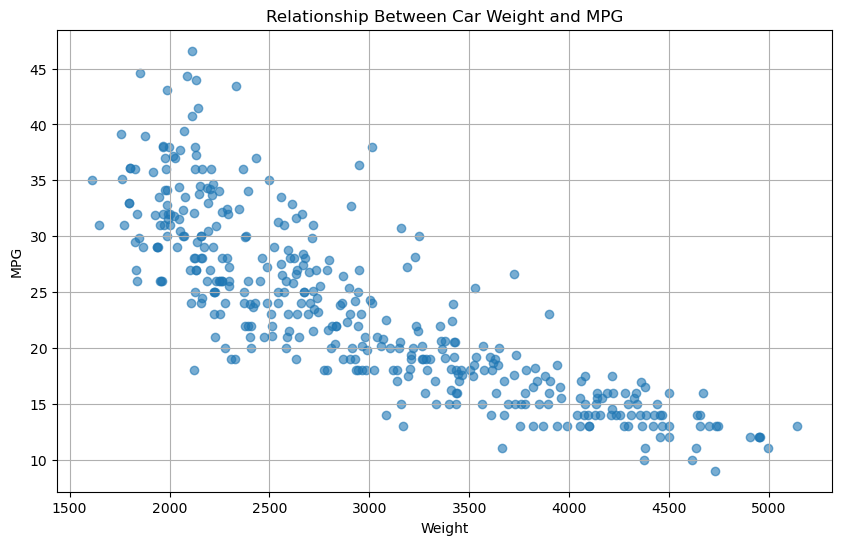

In [15]:

file_path = 'car_data.csv'

try:
    car_data = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
    exit()

print("Descriptive Statistics:")
print(car_data.describe())

plt.figure(figsize=(10, 6))
plt.scatter(car_data['weight'], car_data['MPG'], alpha=0.6)
plt.title('Relationship Between Car Weight and MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


**Written answer: What do you see here? Discuss your findings**
#### **Trend Observed**
- Typically, there is an **inverse relationship** between car weight and mpg:
  - **Heavier cars** tend to have lower mpg (less fuel-efficient).
  - **Lighter cars** are often more fuel-efficient, achieving higher mpg.

#### **Supporting Observations**
- The scatter plot reveals a clear downward trend, indicating that as the weight of a car increases, its fuel efficiency decreases.
- Descriptive statistics show the range, mean, and variability of both `weight` and `mpg`, supporting the observed trend.

### Question 1.2: point

Recall that the linear model, we obtain predictions by computing

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$. Print the dimensionality of the numpy-array that you get.

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [16]:
def linearModelPredict(X, b):
    """
    Compute linear model predictions.

    Parameters:
        X (numpy.ndarray): 2D design matrix including a column of ones.
        b (numpy.ndarray): 1D array of coefficients.

    Returns:
        numpy.ndarray: Predicted outcomes (yp).
    """
    return np.dot(X, b)

X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])

yp = linearModelPredict(X, b)

print("Predicted values (ŷ):", yp)
print("Dimensionality of predictions:", yp.shape)

Predicted values (ŷ): [ 0.1 -0.2  0.7]
Dimensionality of predictions: (3,)


### Question 1.3:

Write a function `linearModelMSE` which computes and returns the mean squared error parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1D-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2D-array, and as its third argument a 1D-array `y` of observed outcomes. Recall that:

$$
MSE(y_i, \hat{y_i}) = \frac{1}{|I|} \sum_i (y_i - \hat{y_i})^2
$$
$$
\nabla MSE(y, \hat{y}) = -\frac{2}{|I|} \left[(y-\hat{y}) \cdot X\right]
$$

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.



In [17]:
import numpy as np

def linearModelMSE(beta, X, y):
    """
    Computes the Mean Squared Error (MSE) and its gradient for a linear model.

    Parameters:
    - beta (np.ndarray): 1D array of coefficients for the linear model.
    - X (np.ndarray): 2D design matrix.
    - y (np.ndarray): 1D array of observed outcomes.

    Returns:
    - mse (float): The mean squared error.
    - gradient (np.ndarray): The gradient of the MSE with respect to beta.
    """
    y_hat = X @ beta  
    
    residuals = y - y_hat
    
    mse = np.mean(residuals ** 2)
    
    gradient = (-2 / len(y)) * (residuals @ X)
    
    return mse, gradient

X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

loss, grad = linearModelMSE(b, X, y)

print("Loss (MSE):", loss)
print("Gradient:", grad)

Loss (MSE): 0.6866666666666666
Gradient: [-1.2        -1.33333333]


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters?

It depends on how each parameter influences the residuals (as indicated by the gradient). If the gradient for a given parameter is positive, you decrease that parameter; if it is negative, you increase it—each step is taken in the direction that reduces the overall loss.


### Question 1.4:

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2D-array, as its second argument a 1D-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the $R^2$. Pass the argument `jac=True` to the `miminize` function so that it uses your gradient.

Test the function with the values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```

Report the best parameters and the fitted $R^2$.


In [18]:
import numpy as np
from scipy.optimize import minimize

def linearModelFit(X, y, lossfcn):
    """
    Fits a linear model by minimizing the provided loss function.

    Parameters:
    - X (np.ndarray): 2D design matrix.
    - y (np.ndarray): 1D array of observed outcomes.
    - lossfcn (callable): Loss function that returns a tuple (loss, gradient).

    Returns:
    - beta_opt (np.ndarray): Estimated coefficients after optimization.
    - R2 (float): Coefficient of determination for the fitted model.
    """
    initial_beta = np.zeros(X.shape[1])
    
    def loss_and_grad(beta):
        mse, grad = lossfcn(beta, X, y)
        return mse, grad
    
    result = minimize(
        fun=loss_and_grad,
        x0=initial_beta,
        method='BFGS',
        jac=True  
    )
    
    if not result.success:
        raise ValueError("Optimization failed: " + result.message)
    
    beta_opt = result.x
    
    y_hat = X @ beta_opt
    
    ss_res = np.sum((y - y_hat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - (ss_res / ss_tot)
    
    return beta_opt, R2

X = np.array([[1, 0], [1, -1], [1, 2]])
y = np.array([0, 0.4, 2])
    
best_beta, fitted_R2 = linearModelFit(X, y, linearModelMSE)

print(f"Best Parameters (beta): {best_beta}")
print(f"Fitted R^2: {fitted_R2}")


Best Parameters (beta): [0.59999731 0.600001  ]
Fitted R^2: 0.7499999999904616


### Question 1.5:

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and only the weight variable as the independent (x). Fit the model with a constant. Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


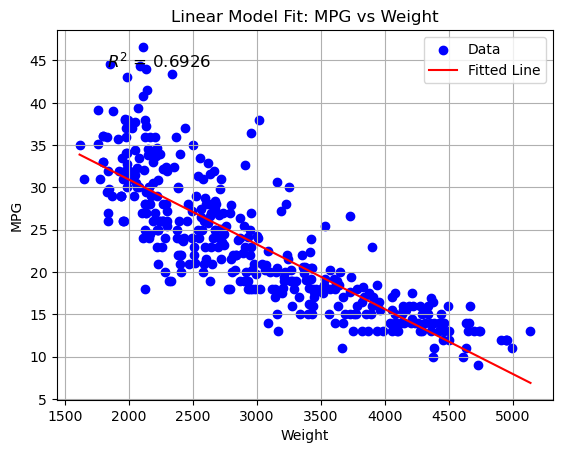

Optimal beta coefficients: [ 4.62165245e+01 -7.64734254e-03]
R-squared: 0.6926304331206254


In [19]:
y = car_data["MPG"].values
weight = car_data["weight"].values

X = np.column_stack((np.ones(weight.shape[0]), weight))

beta_opt, r_squared = linearModelFit(X, y, linearModelMSE)

weight_grid = np.linspace(weight.min(), weight.max(), 100)
X_grid = np.column_stack((np.ones(weight_grid.shape[0]), weight_grid))
predicted_mpg = X_grid @ beta_opt

plt.scatter(weight, y, label="Data", color="blue")
plt.plot(weight_grid, predicted_mpg, label="Fitted Line", color="red")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Linear Model Fit: MPG vs Weight")
plt.annotate(f"$R^2$ = {r_squared:.4f}", xy=(0.1, 0.9), xycoords="axes fraction", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("Optimal beta coefficients:", beta_opt)
print("R-squared:", r_squared)


**Your answer here**

### Question 1.6:

Now use sklearn's `linear_model` to fit the model with all the available data. Plot the data and add a line for the predicted values as you did in the previous question. Also report the $R^2$ value for the fit.

**Written answer: How much do you gain by having more variables?**


Coefficient of Determination (R^2): 0.7077


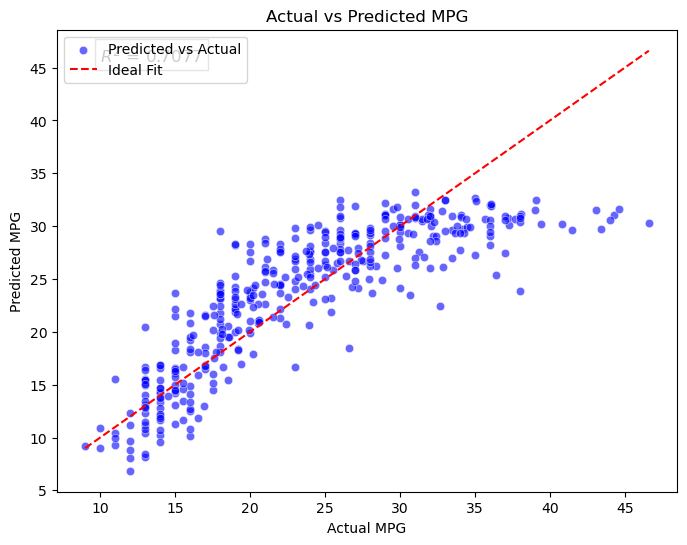

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv('car_data.csv')


y = data['MPG'].values
X = data.drop(['MPG', 'name'], axis=1).values

model = LinearRegression()
model.fit(X, y)



y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"\nCoefficient of Determination (R^2): {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.text(y.min() + 1, y.max() - 1, f'$R^2$ = {r2:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()


**How much do you gain by having more variables?**

Adding additional, relevant predictors typically increases the explanatory power of your model, often reflected by a higher \(R^2\) or lower prediction error. However, each new variable adds complexity—potentially leading to overfitting—so the net benefit depends on whether the additional features provide genuinely new information that improves prediction beyond what you already have.


## Part 2: LAD Regression

### Question 2.1:

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss $LAD(y_i, \hat{y_i})$.

$$
LAD(y_i, \hat{y_i}) = \frac{1}{|I|}\sum_i |y_i - \hat{y_i}|
$$

where $y_i$ is the true label of sample $i \in I$, $\hat{y_i}$ is the prediction, $I$ is the sample set, and $|I|$ is the number of cases in the sample. The gradient of the function is:

$$
\nabla LAD(y, \hat{y}) = - \frac{ sign(y_i - \hat{y_i}) \cdot X}{|I|}
$$

with `sign` the sign function. Note this function is undefined at 0.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss, following the same structured as the previous part.

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.

In [21]:
import numpy as np

def linearModelLossLAD(X, beta, y):
    """
    Computes the Least Absolute Deviation (LAD) loss and its gradient for a linear model.

    Parameters:
    - X (np.ndarray): Feature matrix of shape (n_samples, n_features).
    - beta (np.ndarray): Parameter vector of shape (n_features,).
    - y (np.ndarray): True labels of shape (n_samples,).

    Returns:
    - loss (float): The LAD loss.
    - gradient (np.ndarray): The gradient of the loss with respect to beta.
    """
    y_pred = X @ beta  
    
    residuals = y - y_pred 
    
    loss = np.mean(np.abs(residuals))
    
    signs = np.sign(residuals)  
    
    signs[residuals == 0] = 0
    
    gradient = - (X.T @ signs) / X.shape[0]
    
    return loss, gradient

X = np.array([[1, 0],
              [1, -1],
              [1, 2]])
beta = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

loss, gradient = linearModelLossLAD(X, beta, y)

print(f"LAD Loss: {loss}")
print(f"Gradient: {gradient}")


LAD Loss: 0.6666666666666666
Gradient: [-0.33333333 -0.33333333]


### Question 2.2:


Use the above functions to fit your LAD model using the weight variable as input, to predict the mpg. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

**Written answer**: What is the difference in the fit obtained with an $L_1$ as compared to the $L_2$ cost function? How do their $R^2$ values compare? Why?  

Note: If you receive an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient-based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



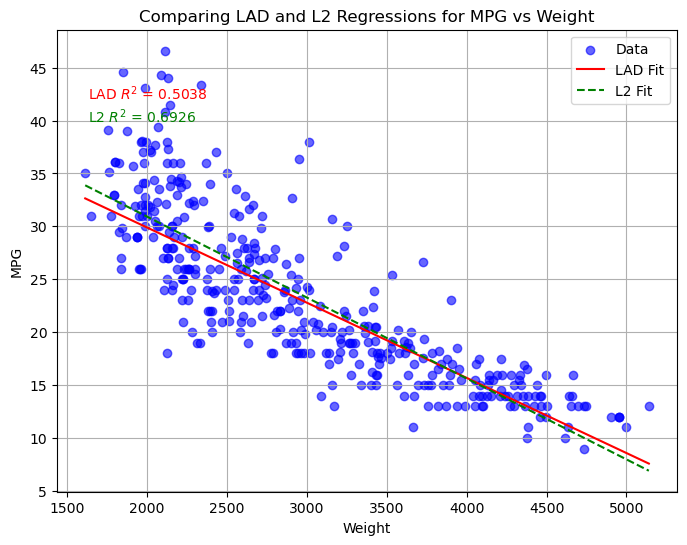

LAD Model Results:
  Optimal coefficients (intercept, slope): [ 4.41040794e+01 -7.10504587e-03]
  LAD-based R^2: 0.5038407518407623

L2 Model Results:
  Optimal coefficients (intercept, slope): [ 4.62165245e+01 -7.64734254e-03]
  MSE-based R^2: 0.6926304331206254


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


car_data = pd.read_csv("car_data.csv")

y = car_data["MPG"].values

weight = car_data["weight"].values

X = np.column_stack((np.ones(weight.shape[0]), weight))


def linearModelLossLAD(X, beta, y):
    """
    Computes the Least Absolute Deviation (LAD) loss and its gradient for a linear model.
    
    Parameters:
    - X (np.ndarray): Feature matrix of shape (n_samples, n_features).
    - beta (np.ndarray): Parameter vector of shape (n_features,).
    - y (np.ndarray): True labels of shape (n_samples,).
    
    Returns:
    - loss (float): The LAD loss (mean absolute error).
    - gradient (np.ndarray): The gradient of the loss with respect to beta.
    """
    y_pred = X @ beta 

    residuals = y - y_pred

    loss = np.mean(np.abs(residuals))

    signs = np.sign(residuals)
    signs[residuals == 0] = 0

    gradient = -(X.T @ signs) / X.shape[0]

    return loss, gradient


initial_beta = np.zeros(X.shape[1])

def objective_lad(beta, X, y):
    loss, _ = linearModelLossLAD(X, beta, y)
    return loss

def gradient_lad(beta, X, y):
    _, grad = linearModelLossLAD(X, beta, y)
    return grad

try:
    result_lad = minimize(
        objective_lad,
        initial_beta,
        args=(X, y),
        method='BFGS',
        jac=gradient_lad
    )
except:
    result_lad = minimize(
        objective_lad,
        initial_beta,
        args=(X, y),
        method='Powell'
    )

beta_opt_lad = result_lad.x


def linearModelMSE(X, beta, y):
    """
    Computes the Mean Squared Error (MSE) loss and its gradient for a linear model.
    """
    y_pred = X @ beta
    residuals = y - y_pred
    loss = np.mean(residuals**2)
    gradient = -2 * (X.T @ residuals) / X.shape[0]
    return loss, gradient

def objective_l2(beta, X, y):
    loss, _ = linearModelMSE(X, beta, y)
    return loss

def gradient_l2(beta, X, y):
    _, grad = linearModelMSE(X, beta, y)
    return grad

result_l2 = minimize(
    objective_l2,
    initial_beta,
    args=(X, y),
    method='BFGS',
    jac=gradient_l2
)
beta_opt_l2 = result_l2.x

y_pred_lad = X @ beta_opt_lad


ss_res_lad = np.sum(np.abs(y - y_pred_lad))
ss_tot_lad = np.sum(np.abs(y - np.mean(y)))
r_squared_lad = 1 - ss_res_lad / ss_tot_lad

y_pred_l2 = X @ beta_opt_l2


ss_res_l2 = np.sum((y - y_pred_l2)**2)
ss_tot_l2 = np.sum((y - np.mean(y))**2)
r_squared_l2 = 1 - ss_res_l2 / ss_tot_l2

weight_grid = np.linspace(weight.min(), weight.max(), 100)
X_grid = np.column_stack((np.ones(weight_grid.shape[0]), weight_grid))
predicted_mpg_lad = X_grid @ beta_opt_lad
predicted_mpg_l2 = X_grid @ beta_opt_l2

plt.figure(figsize=(8, 6))
plt.scatter(weight, y, label="Data", color="blue", alpha=0.6)

plt.plot(weight_grid, predicted_mpg_lad, label="LAD Fit", color="red")

plt.plot(weight_grid, predicted_mpg_l2, label="L2 Fit", color="green", linestyle="--")

plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Comparing LAD and L2 Regressions for MPG vs Weight")

plt.annotate(f"LAD $R^2$ = {r_squared_lad:.4f}",
             xy=(0.05, 0.85), xycoords="axes fraction", color="red")
plt.annotate(f"L2 $R^2$ = {r_squared_l2:.4f}",
             xy=(0.05, 0.80), xycoords="axes fraction", color="green")

plt.legend()
plt.grid(True)
plt.show()


print("LAD Model Results:")
print("  Optimal coefficients (intercept, slope):", beta_opt_lad)
print("  LAD-based R^2:", r_squared_lad)

print("\nL2 Model Results:")
print("  Optimal coefficients (intercept, slope):", beta_opt_l2)
print("  MSE-based R^2:", r_squared_l2)


# LAD (Least Absolute Deviation) Model

- **Loss Function**: Minimizes the sum of absolute residuals \(\|y - X\beta\|_1\).  
- **Outlier Robustness**: Large residuals are not penalized as heavily because the absolute value grows linearly, making LAD more robust to outliers.

# L2 (Mean Squared Error) Model

- **Loss Function**: Minimizes the sum of squared residuals \(\|y - X\beta\|_2^2\).  
- **Outlier Influence**: Squaring large residuals amplifies their effect on the fit, making the L2 solution more sensitive to outliers.

# Comparison of \(R^2\) Values

- **Higher \(R^2\) for L2**: Squaring errors more severely penalizes large deviations, typically leading to a higher \(R^2\).  
- **Lower \(R^2\) for LAD**: LAD does not “chase” outliers as aggressively and can yield a better overall fit in the presence of extreme points, though it often results in a slightly lower \(R^2\).




### Question 2.3:

Now we will use all data for the fit. Fit an LAD model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`QuantileRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) class that implements a [pinball loss](https://en.wikipedia.org/wiki/Quantile_regression), a more general case of the [`mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html) loss. To get an MAD regression, set the parameters `alpha=0` and `quantile=0.5` in the `QuantileRegressor` call.

In no more than two sentences, comment on the $R^2$ values for both the OLS and MAD regressions. Use the `sklearn` models for this analysis. Are they similar? Make a scatterplot of the sklearn's OLS and MAD predictions.

R^2 (OLS): 0.7077
R^2 (MAD): 0.6922


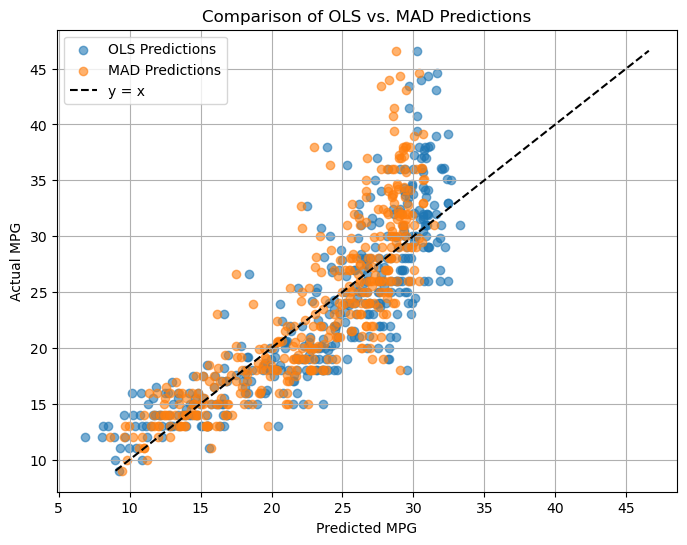

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, QuantileRegressor

car_data = pd.read_csv("car_data.csv")

X = car_data.drop(columns=["MPG", "name"])
y = car_data["MPG"]

ols_model = LinearRegression()
ols_model.fit(X, y)
r2_ols = ols_model.score(X, y)

mad_model = QuantileRegressor(quantile=0.5, alpha=0, solver='highs')
mad_model.fit(X, y)
r2_mad = mad_model.score(X, y)

print(f"R^2 (OLS): {r2_ols:.4f}")
print(f"R^2 (MAD): {r2_mad:.4f}")

y_pred_ols = ols_model.predict(X)
y_pred_mad = mad_model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(y_pred_ols, y, alpha=0.6, label="OLS Predictions")
plt.scatter(y_pred_mad, y, alpha=0.6, label="MAD Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="y = x")

plt.xlabel("Predicted MPG")
plt.ylabel("Actual MPG")
plt.title("Comparison of OLS vs. MAD Predictions")
plt.legend()
plt.grid(True)
plt.show()


## Written Answer

**Comment on the \(R^2\) values for OLS and MAD:**

Both the OLS and MAD regressions yield very similar \(R^2\) values, suggesting that outliers do not drastically affect the overall fit. As a result, both methods capture the main trend in the data about equally well, with only minor differences in predictive performance.

---